In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

np.random.seed(1)
plt.rcParams['text.color'] = 'black'
sc.set_figure_params(dpi=100, dpi_save=300, facecolor='white')
plt.style.use('ggplot')

colors_1 = ['#F39B7F','#17BECF', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8', '#8491B4', '#E24A33']
colors_2 = ['#FAD6C7', '#AEDFFD', '#AECFEF', '#D7D3E6', '#BEBEBE', '#FCE7B1', '#D5E1A3', '#FFD4D6', '#C4CBE2', '#F0B0A0']


In [22]:
data = pd.read_csv('./data/DEG_bulk.csv')
data.shape

(600, 5)

In [23]:
# 按照 "top-n" 和 "methods" 分组，并计算每组的平均值
data = data[(data.batch_info=='all') & (data['top-n'] <= 400)]
data.shape

(160, 5)

raw
MAGIC
scVI
SAVERX
DeepImpute
Bis
scPSM
SCALEX
scDisInFact
ComGRN


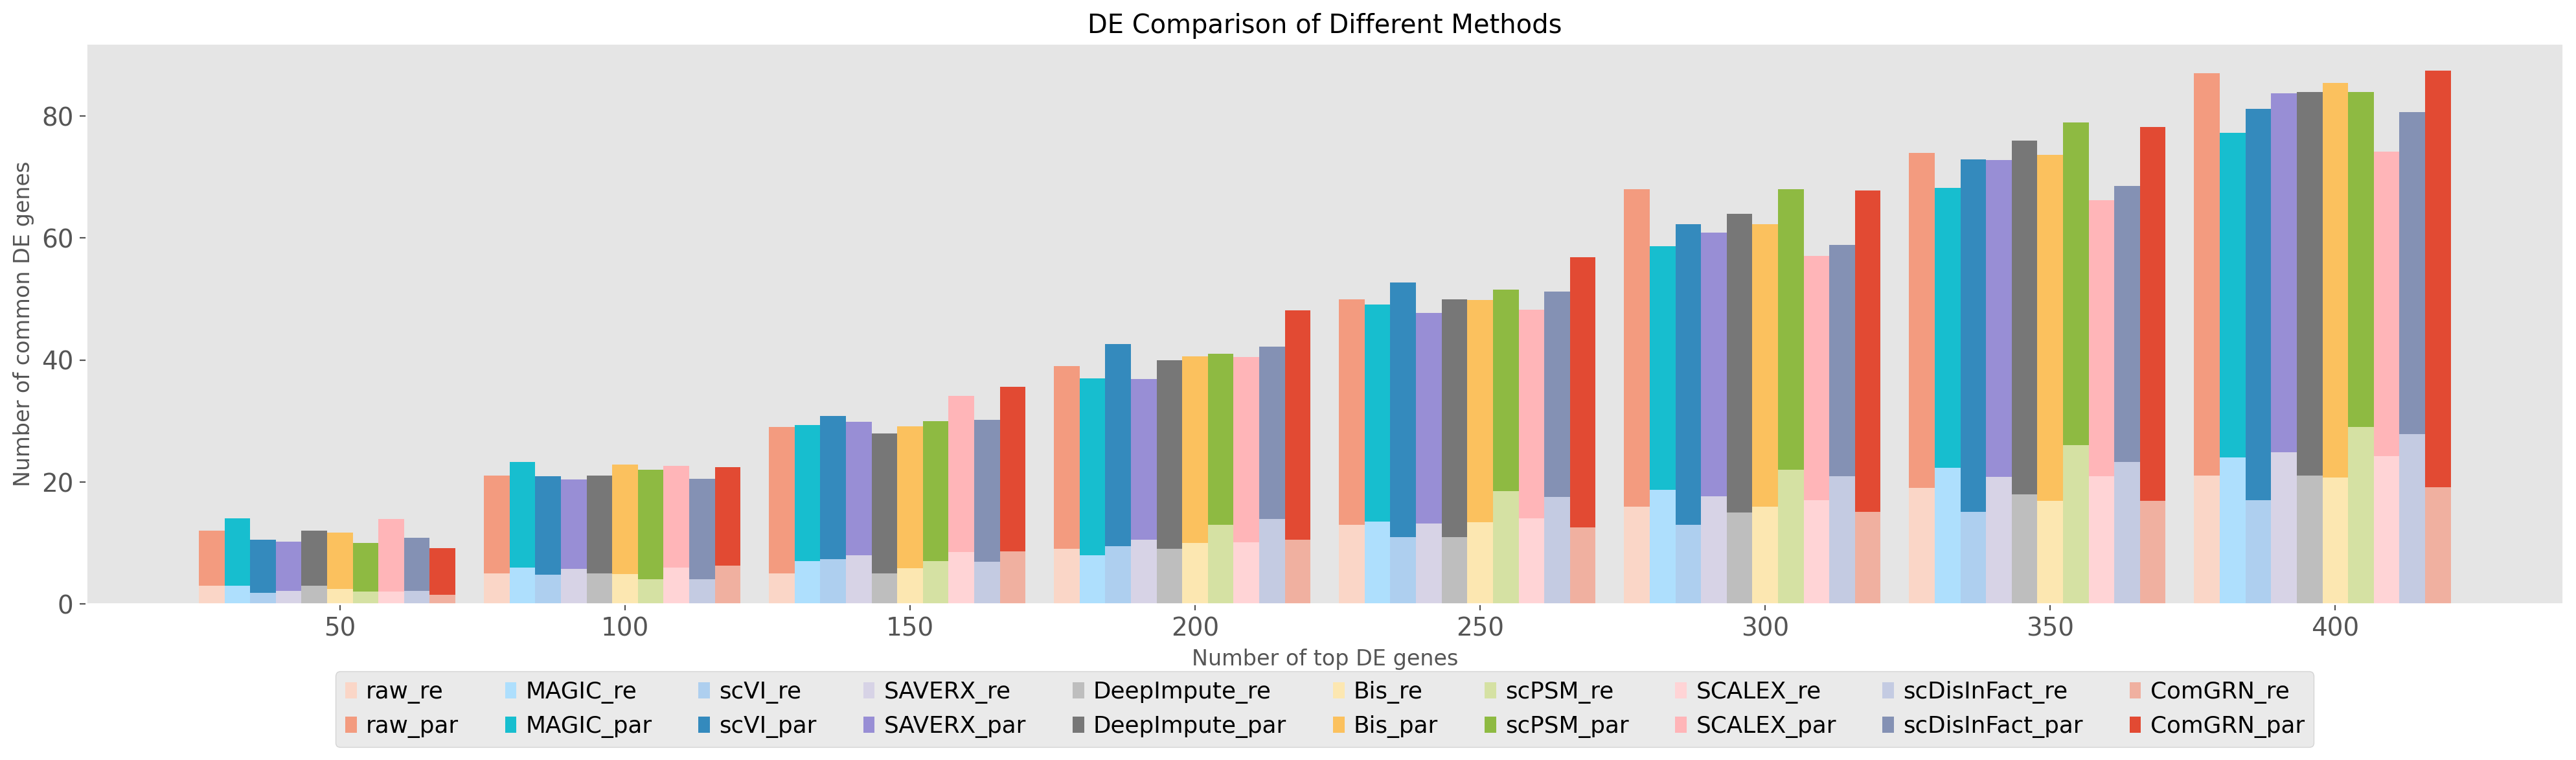

In [24]:
# 绘制条形图
topn = [50, 100, 150, 200, 250, 300, 350, 400]# , 450, 500]
method = ['raw', 'MAGIC', 'scVI', 'SAVERX', 'DeepImpute', 'Bis', 'scPSM', 'SCALEX','scDisInFact','ComGRN']

# Create a bar chart
fig, ax = plt.subplots(figsize=(20, 6))

for i, label in enumerate(method):
    print(label)
    temp_re = data[(data['cell type'] == 're') & (data['methods'] == label)].sort_values(by='top-n', ascending=True)
    temp_par = data[(data['cell type'] == 'par') & (data['methods'] == label)].sort_values(by='top-n', ascending=True)
    bars1 = ax.bar([x + (i-5) * 0.09 for x in range(len(topn))], temp_re['score'].values, width=0.09, 
            label=label+'_re', color=colors_2[i])
    bars2 = ax.bar([x + (i-5) * 0.09 for x in range(len(topn))], temp_par['score'].values, width=0.09, 
        label=label+'_par', color=colors_1[i], bottom=temp_re['score'].values)

ax.set_xticks(range(len(topn)))
ax.set_xticklabels(topn)
ax.set_xlabel('Number of top DE genes')
ax.set_title('DE Comparison of Different Methods')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),ncol=10)
plt.ylabel('Number of common DE genes')
plt.grid(False)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./fig/DEG_2.pdf')
plt.show()

In [25]:
data = pd.read_csv('./data/DEG_bec.csv', sep='\t')
data.head()

,methods,cell type,p_values,score
0,raw,re,0.000,0.0
1,raw,re,0.002,907.0
2,raw,re,0.004,954.0
3,raw,re,0.006,979.0
4,raw,re,0.008,996.0


In [26]:
# 按照 "top-n" 和 "methods" 分组，并计算每组的平均值
data = data[(data['cell type']=='re') & (data['p_values']>0)]

raw
MAGIC
scVI
SAVERX
DeepImpute
Bis
scPSM
SCALEX
scDisInFact
ComGRN


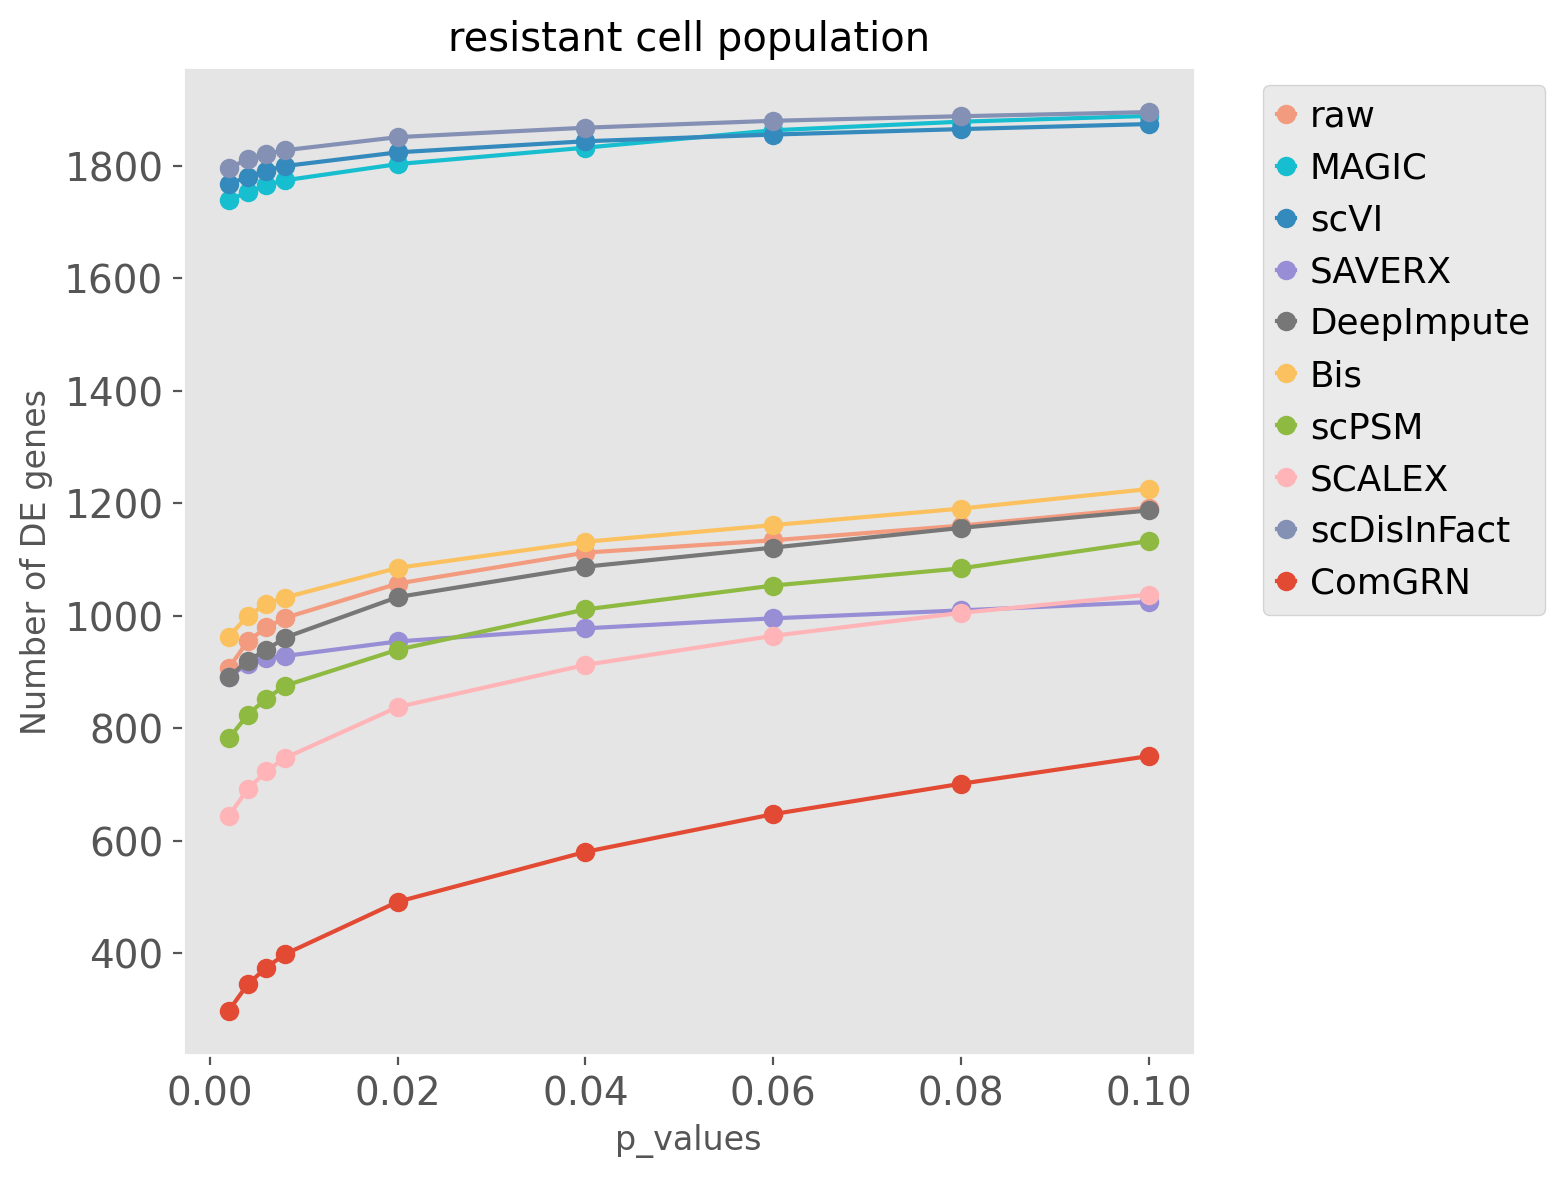

In [27]:
# 绘制折线图
plt.figure(figsize=(8, 6))

for i, label in enumerate(method):
    print(label)
    temp = data[data['methods'] == label].sort_values(by='p_values', ascending=True)
    plt.plot(temp['p_values'], temp['score'], marker='o', label=label, linestyle='-', color=colors_1[i])


ax.set_xticks(temp['p_values'])
ax.set_xticklabels(temp['p_values'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('p_values')
plt.ylabel('Number of DE genes')
plt.title('resistant cell population')
plt.grid(False)
plt.tight_layout()
plt.savefig('./fig/DEG_3_1.pdf')
plt.show()

In [28]:
# 按照 "top-n" 和 "methods" 分组，并计算每组的平均值
data = pd.read_csv('./data/DEG_bec.csv', sep='\t')
data.head()
data = data[(data['cell type']=='par') & (data['p_values']>0)]

raw
MAGIC
scVI
SAVERX
DeepImpute
Bis
scPSM
SCALEX
scDisInFact
ComGRN


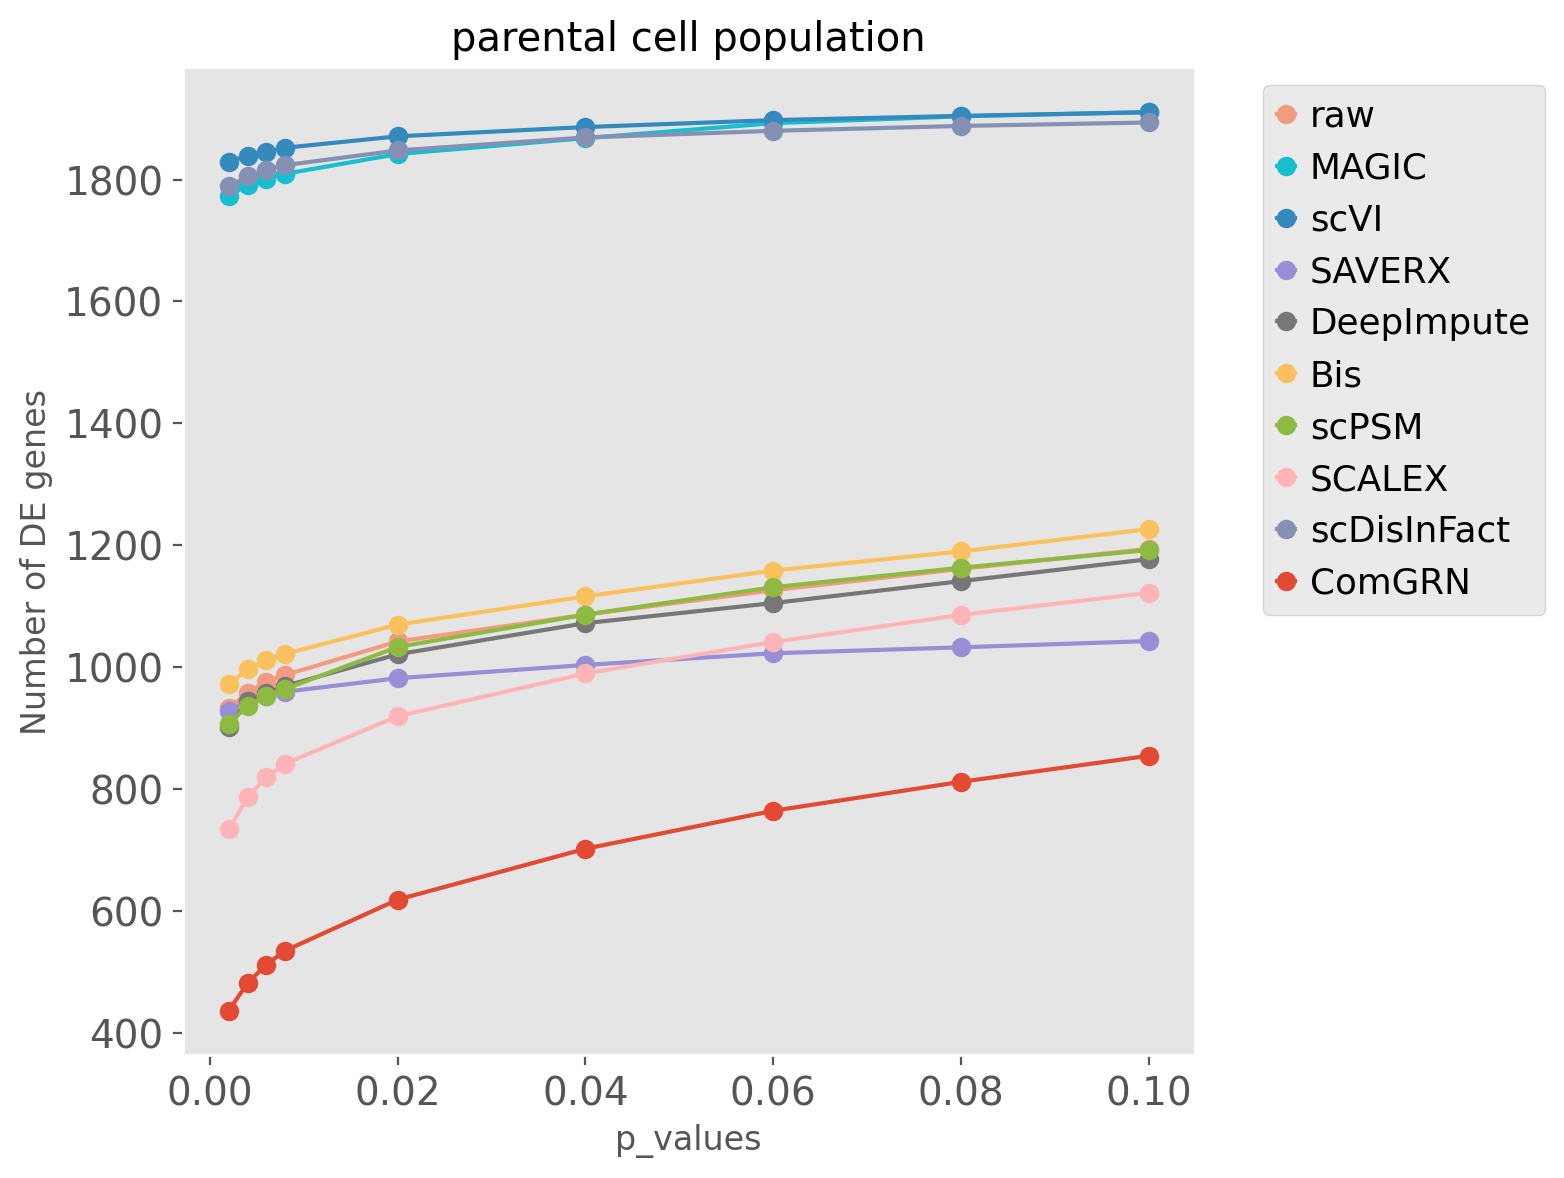

In [29]:
# 绘制折线图
plt.figure(figsize=(8, 6))

for i, label in enumerate(method):
    print(label)
    temp = data[data['methods'] == label].sort_values(by='p_values', ascending=True)
    plt.plot(temp['p_values'], temp['score'], label=label, marker='o', linestyle='-', color=colors_1[i])


ax.set_xticks(temp['p_values'])
ax.set_xticklabels(temp['p_values'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('p_values')
plt.ylabel('Number of DE genes')
plt.title('parental cell population')
plt.grid(False)
plt.tight_layout()
plt.savefig('./fig/DEG_3_2.pdf')
plt.show()

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
topn = [100, 200, 300, 400][::-1]
method = ['raw', 'ComGRN'][::-1]

data = pd.read_csv('./data/DEG_bulk.csv')
data.shape

(600, 5)

In [31]:
# 设置柱状图位置
y = np.arange(len(topn))
height = 0.35

In [32]:
data.head()

,methods,cell type,batch_info,top-n,score
0,raw,re,0,100,5.0
1,raw,re,0,150,9.0
2,raw,re,0,200,12.0
3,raw,re,0,250,19.0
4,raw,re,0,300,22.0


In [33]:
data = data[np.isin(data['top-n'],[100, 200, 300, 400])]

In [34]:
# Batch1数据
raw1_re = data[(data['methods'] =='raw') &  (data["cell type"] =='re') & (data['batch_info'] == '0') & (data['top-n'] <=400)].score[::-1]
raw1_par = data[(data['methods'] =='raw') &  (data["cell type"] =='par') & (data['batch_info'] == '0') & (data['top-n'] <=400)].score[::-1]
comgrn1_re = data[(data['methods'] =='ComGRN') &  (data["cell type"] =='re') & (data['batch_info'] == '0') & (data['top-n'] <=400)].score[::-1]
comgrn1_par =  data[(data['methods'] =='ComGRN') &  (data["cell type"] =='par') & (data['batch_info'] == '0') & (data['top-n'] <=400)].score[::-1]


# Batch2数据
raw2_re = data[(data['methods'] =='raw') &  (data["cell type"] =='re') & (data['batch_info'] == '1') & (data['top-n'] <=400)].score[::-1]
raw2_par = data[(data['methods'] =='raw') &  (data["cell type"] =='par') & (data['batch_info'] == '1') & (data['top-n'] <=400)].score[::-1]
comgrn2_re = data[(data['methods'] =='ComGRN') &  (data["cell type"] =='re') & (data['batch_info'] == '1') & (data['top-n'] <=400)].score[::-1]
comgrn2_par =  data[(data['methods'] =='ComGRN') &  (data["cell type"] =='par') & (data['batch_info'] == '1') & (data['top-n'] <=400)].score[::-1]


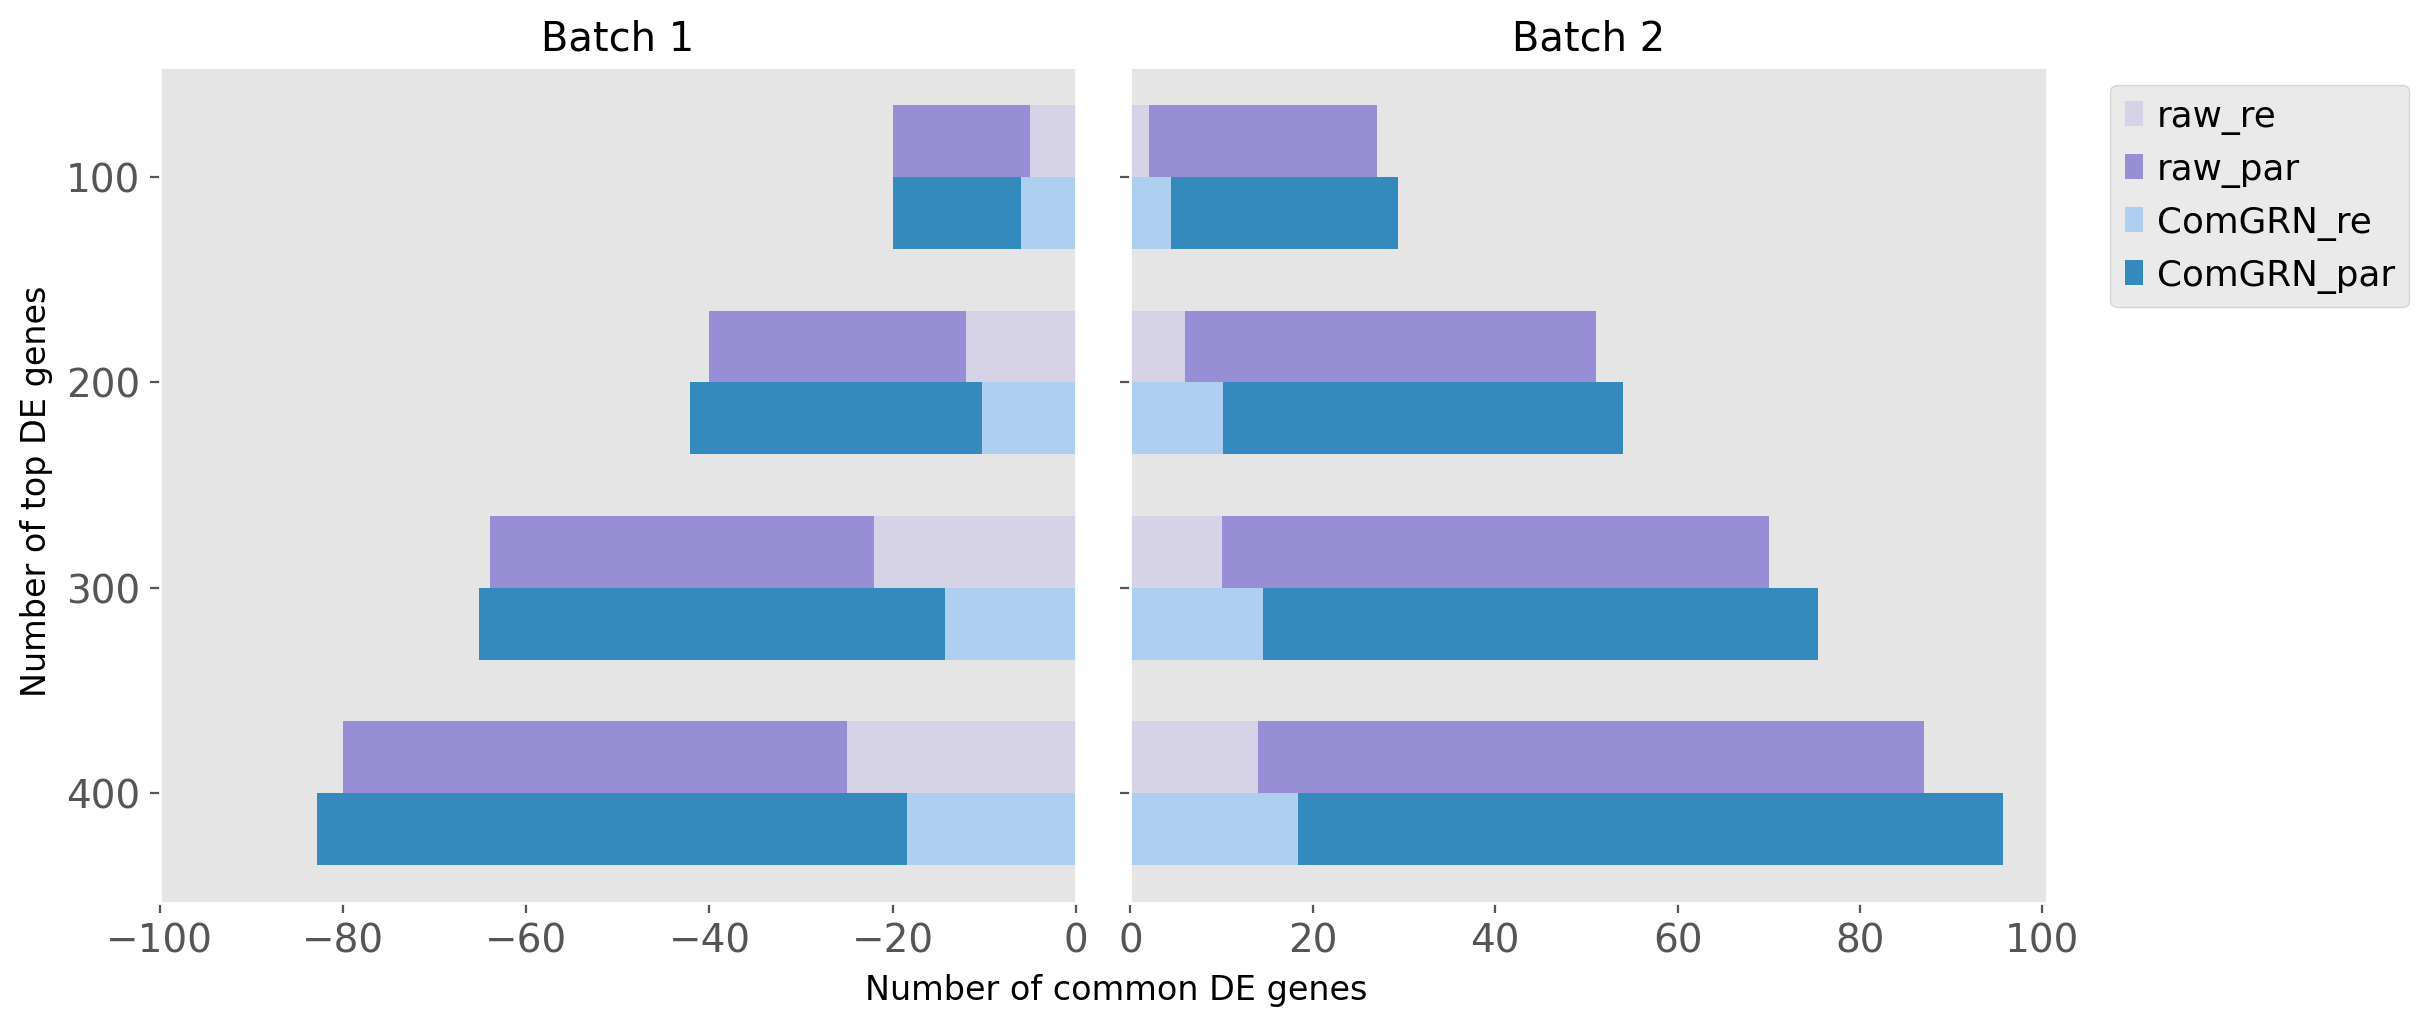

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)


# 画Batch1 (反转表示)
ax1.barh(y + height/2, -raw1_re, height, label='raw_re', color='#D7D3E6')
ax1.barh(y + height/2, -raw1_par, height, left=-raw1_re, label='raw_par', color='#988ED5')
ax1.barh(y - height/2, -comgrn1_re, height, label='ComGRN_re', color='#AECFEF')
ax1.barh(y - height/2, -comgrn1_par, height, left=-comgrn1_re, label='ComGRN_par', color='#348ABD')

ax1.set(title='Batch 1', yticks=y, yticklabels=topn[::-1])  # 反转y轴顺序
ax1.set_xlim(-100, 0)

# ax1.set_yticks(y)
# ax1.set_yticklabels(categories)
# ax1.legend()

# 画Batch2
ax2.barh(y + height/2, raw2_re, height, label='raw_re', color='#D7D3E6')
ax2.barh(y + height/2, raw2_par, height, left=raw2_re, label='raw_par', color='#988ED5')
ax2.barh(y - height/2, comgrn2_re, height, label='ComGRN_re', color='#AECFEF')
ax2.barh(y - height/2, comgrn2_par, height, left=comgrn2_re, label='ComGRN_par', color='#348ABD')

ax2.set(title='Batch 2', yticks=y, yticklabels=topn[::-1])  # 反转y轴顺序
ax2.set_yticks(y)
ax2.set_yticklabels(topn)
ax2.legend()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.text(0.45, 0.0, 'Number of common DE genes', ha='center', va='center', fontsize=12)
fig.text(0.0, 0.5, 'Number of top DE genes', ha='center', va='center', rotation='vertical', fontsize=12)

ax1.grid(False)
ax2.grid(False)
plt.tight_layout()
plt.savefig('./fig/DEG_1.pdf')
plt.show()